Import the Dependencies

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Data collection and Analysis

In [71]:
#loading the data from csv file to a Pandas Dataframe
customer_data=pd.read_csv('Mall_Customers.csv')

In [72]:
#first five rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
#finding the number of rows and columns
customer_data.shape

(200, 5)

In [74]:
#getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [75]:
#checking for the missing value
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

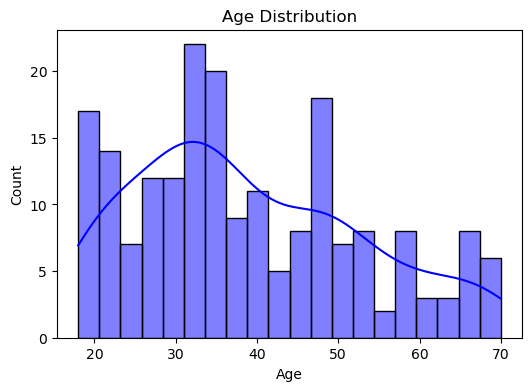

In [76]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(customer_data['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

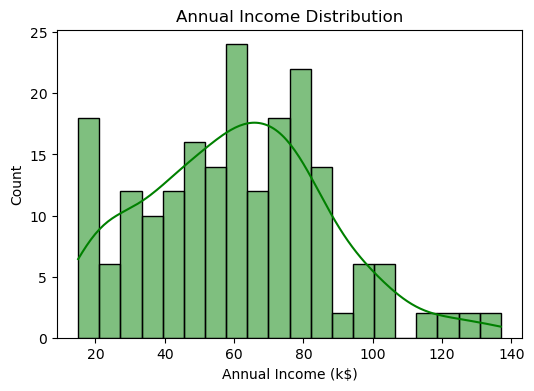

In [77]:
#Annual Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(customer_data['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title("Annual Income Distribution")
plt.show()

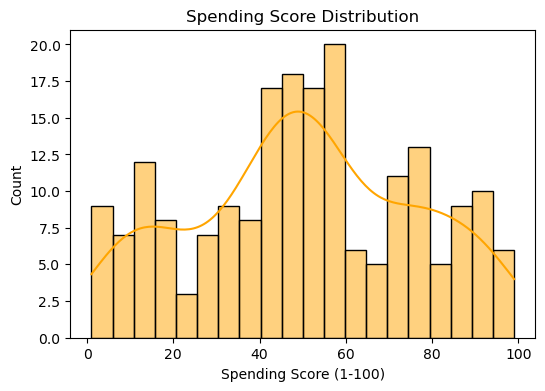

In [78]:
# Spending Score distribution
plt.figure(figsize=(6,4))
sns.histplot(customer_data['Spending Score (1-100)'], bins=20, kde=True, color='orange')
plt.title("Spending Score Distribution")
plt.show()

C:\Users\DURGA DAMAI\AppData\Local\Temp\ipykernel_13032\813051088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=customer_data, palette='Set2')


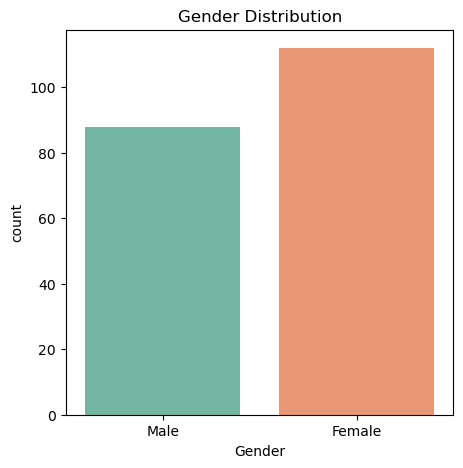

In [79]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=customer_data, palette='Set2')
plt.title("Gender Distribution")
plt.show()

C:\Users\DURGA DAMAI\AppData\Local\Temp\ipykernel_13032\4070899929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=customer_data, palette='Set3')


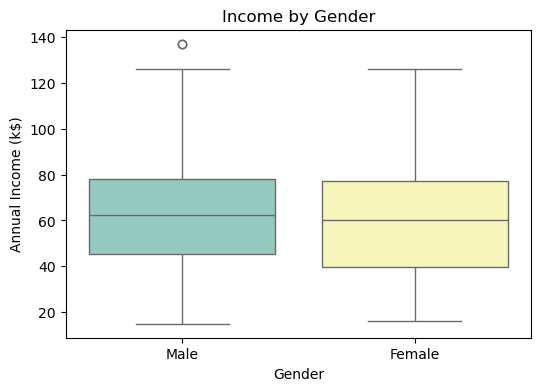

C:\Users\DURGA DAMAI\AppData\Local\Temp\ipykernel_13032\4070899929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=customer_data, palette='Set3')


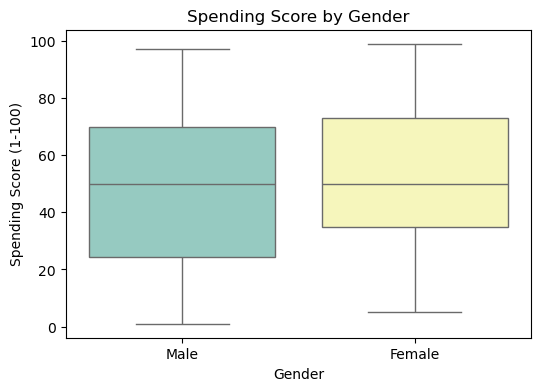

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=customer_data, palette='Set3')
plt.title("Income by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=customer_data, palette='Set3')
plt.title("Spending Score by Gender")
plt.show()


Choosing the Annual Income Column & Spending Score column

In [81]:
X = customer_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

In [82]:
print(X)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

Choosing the number of clusters

WCSS --> Within Clusters Sum of Squares

In [83]:
#finding wcss value for different number of clusters
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

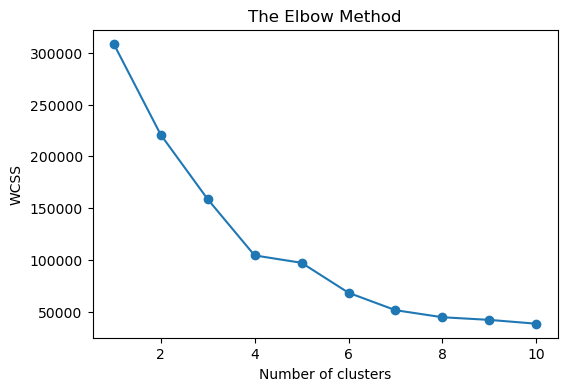

In [84]:
# Plot an elbow graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), WCSS, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [85]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)

#return a label for each data point based on their structure
Y = kmeans.fit_predict(X)
print(Y)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 4 4 4 0 4 4 0 0 0 0 0 4 0 0 4 0 0 0 4 4 0 4 4 0 0 0 0
 0 4 4 4 4 0 0 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 4 0 0 0
 4 4 4 4 4 0 4 4 4 4 4 4 1 4 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Clusters-0,1,2,3,4

In [86]:
# --- Saving the Clustered Data ---

# Add the cluster labels to the original DataFrame
customer_data['Cluster'] = Y

# Save the final data with the new 'Cluster' column
customer_data.to_csv("Customer_Segments_with_clusters.csv", index=False)

Visualizing the Clusters

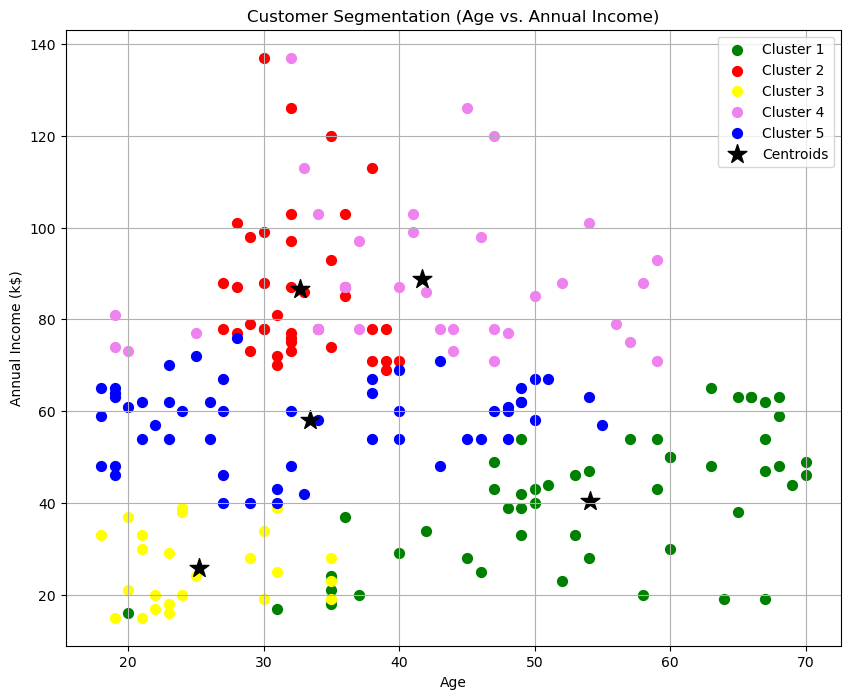

In [87]:
#Age vs. Annual Income
plt.figure(figsize=(10, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids', marker='*')
plt.title('Customer Segmentation (Age vs. Annual Income)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.grid(True)
plt.show()


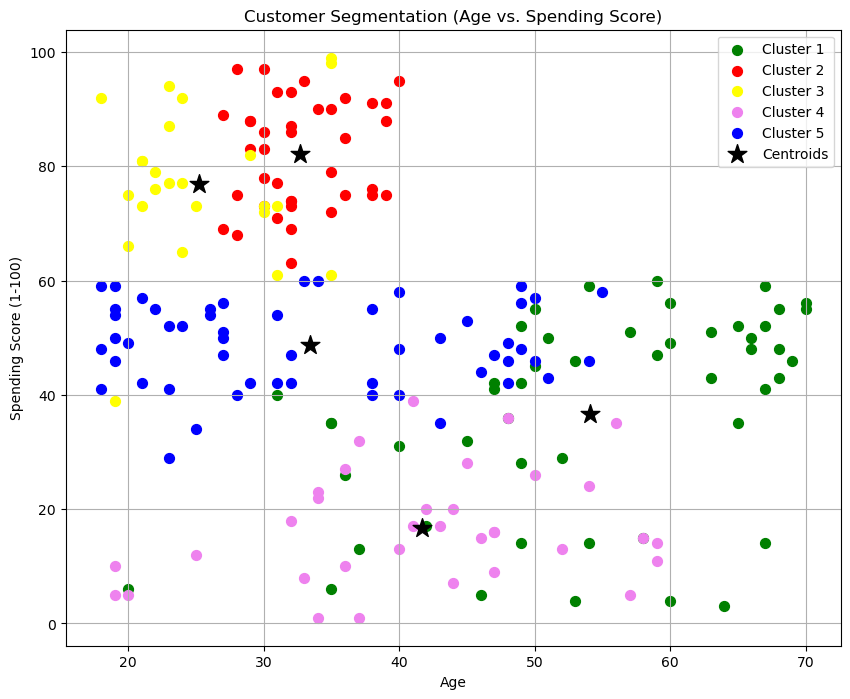

In [88]:
#Age vs. Spending Score
plt.figure(figsize=(10, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 2], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 2], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 2], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 2], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 2], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=200, c='black', label='Centroids', marker='*')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

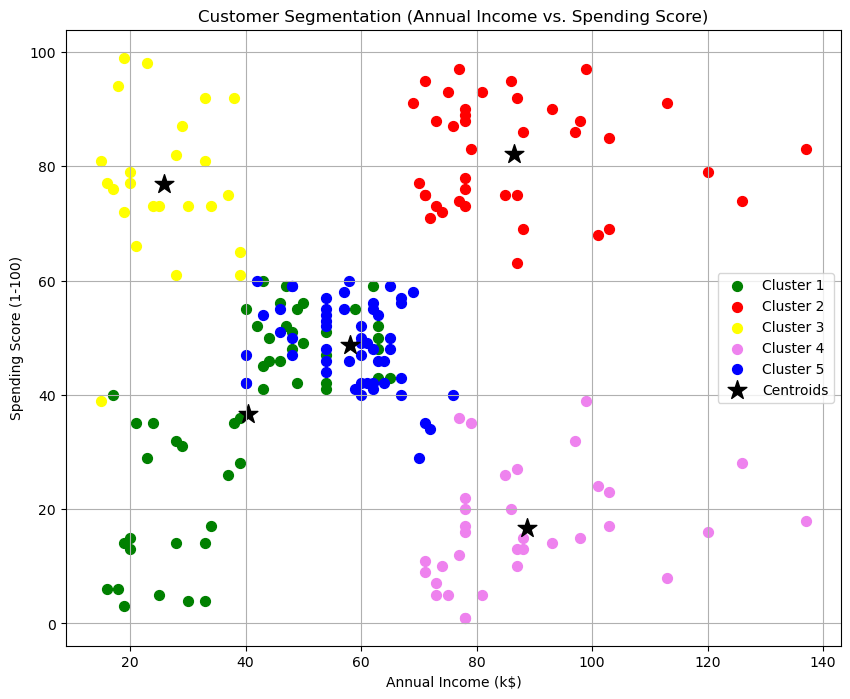

In [89]:
#Annual Income vs. Spending Score
plt.figure(figsize=(10, 8))
plt.scatter(X[Y == 0, 1], X[Y == 0, 2], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 1], X[Y == 1, 2], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 1], X[Y == 2, 2], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y == 3, 1], X[Y == 3, 2], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y == 4, 1], X[Y == 4, 2], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='black', label='Centroids', marker='*')
plt.title('Customer Segmentation (Annual Income vs. Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()